# Entregável 1 - visão computacional

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 2.4.11 


# Equalização de histograma

In [2]:
rintin = cv2.imread("RinTinTin.jpg")

In [3]:
rintin.shape

(240L, 320L, 3L)

In [4]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [5]:
rintin_gray.shape

(240L, 320L)

In [6]:
rintin_gray

array([[21, 39, 42, ..., 41, 41, 37],
       [22, 40, 44, ..., 42, 42, 37],
       [23, 41, 45, ..., 42, 43, 38],
       ..., 
       [14, 28, 35, ..., 18, 18, 17],
       [16, 29, 36, ..., 18, 17, 17],
       [18, 31, 38, ..., 18, 17, 17]], dtype=uint8)

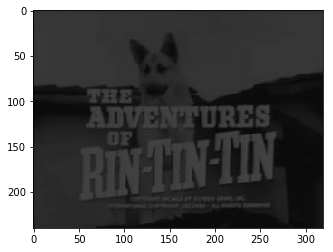

In [7]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

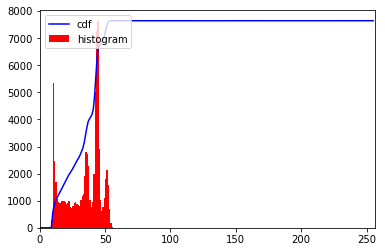

In [8]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_bonitinio = cdf * hist.max()/ cdf.max()

plt.plot(cdf_bonitinio, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores? Não.
2. Equalize o histograma de maneira que a cumulativa seja uma função linear na diagonal do gráfico: BLz
3. Plote a imagem desenhada : Blz2

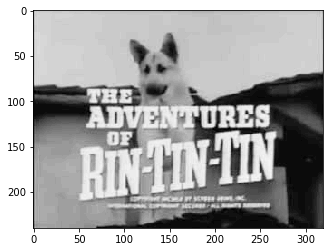

In [9]:
#Equalização do histograma
#Da famosa conversão de ºC pra ºF:
maximo = max(rintin_gray.flatten())
minimo = 255 #Aqui colocamos o valor máximo para que possamos pegar o real minimo
for i in rintin_gray.flatten():
    if i < minimo and i != 0:
        minimo = i
def converte(x):
    k = 256/50
    return k*(x-8)
x = 0
y = 0
for y in range(len(rintin_gray)):
    for x in range(len(rintin_gray[y])):    
        rintin_gray[y][x] = converte(rintin_gray[y][x])

plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

In [10]:
len(rintin_gray)

240

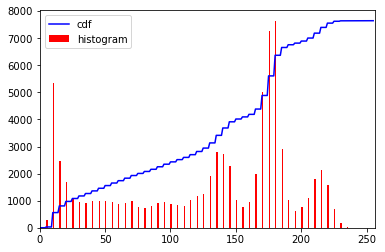

In [11]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_bonitinio = cdf * hist.max()/ cdf.max()

plt.plot(cdf_bonitinio, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

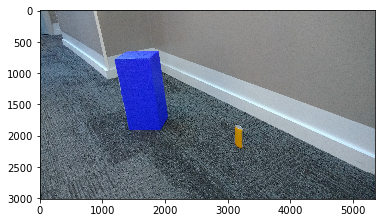

In [12]:
hallbox1 = cv2.imread("hall_box_battery1.jpg")
plt.imshow(hallbox1)

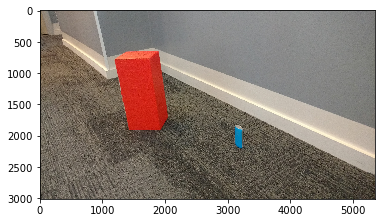

In [13]:
hallbox = cv2.cvtColor(hallbox1, cv2.COLOR_BGR2RGB)
plt.imshow(hallbox)

In [14]:
hall_red = hallbox[:,:,0]
hall_green = hallbox[:,:,1]
hall_blue = hallbox[:,:,2]

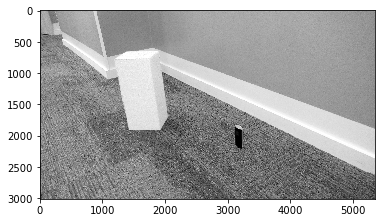

In [15]:
plt.imshow(hall_red, cmap="Greys_r", vmin=0, vmax=255)

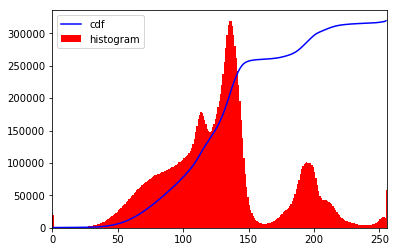

In [16]:
hist,bins = np.histogram(hall_red.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_bonitinio = cdf * hist.max()/ cdf.max()

plt.plot(cdf_bonitinio, color = 'b')
plt.hist(hall_red.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

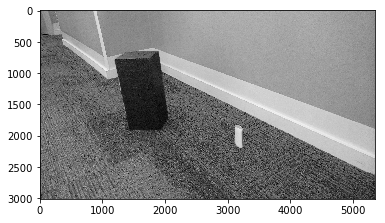

In [17]:
plt.imshow(hall_blue, cmap="Greys_r", vmin=0, vmax=255)

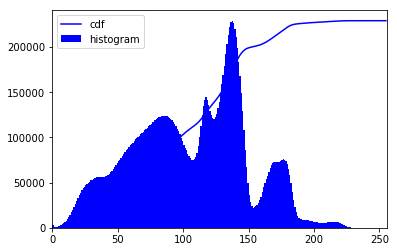

In [18]:
hist,bins = np.histogram(hall_blue.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_bonitinio = cdf * hist.max()/ cdf.max()

plt.plot(cdf_bonitinio, color = 'b')
plt.hist(hall_blue.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

(0, 256)

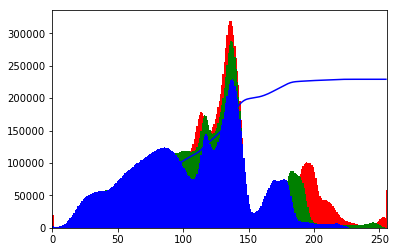

In [19]:
plt.plot(cdf_bonitinio, color = 'b')
plt.hist(hall_red.flatten(),256,[0,256], color = 'r')
plt.hist(hall_green.flatten(),256,[0,256], color = 'g')
plt.hist(hall_blue.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])



1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?



Dá pra saber que com certeza há algo vermelhor de tamanho razoável pela frequência de valores altos no canal R não acompanhados pelos outros canais, porém a caixa azul é tão pequena que não se consegue ver praticamente nada

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui

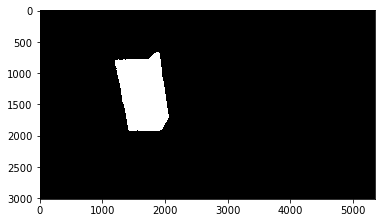

In [46]:
#Nunca dava certo fazer na raça, tive que apelar para o inRange (Sem falar que sempre demorava eras para rodar)

cor_menor = np.array([70,0,0])
cor_maior = np.array([255, 60, 60])
onlyRed = cv2.inRange(hallbox, cor_menor, cor_maior)
kernel = np.ones((10,10),np.uint8)
onlyRed = cv2.erode(onlyRed,kernel,iterations = 1)
onlyRed = cv2.dilate(onlyRed,kernel,iterations = 3)
plt.imshow(onlyRed,cmap="Greys_r")